In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_excel("marketing_data.xlsx")

In [3]:
df.shape

(2240, 22)

DATA PROFILING

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [6]:
# Calculate the average income
average_income = df['Income'].mean()

# Fill the null values in the 'Income' column with the average income
df['Income'].fillna(average_income, inplace=True)

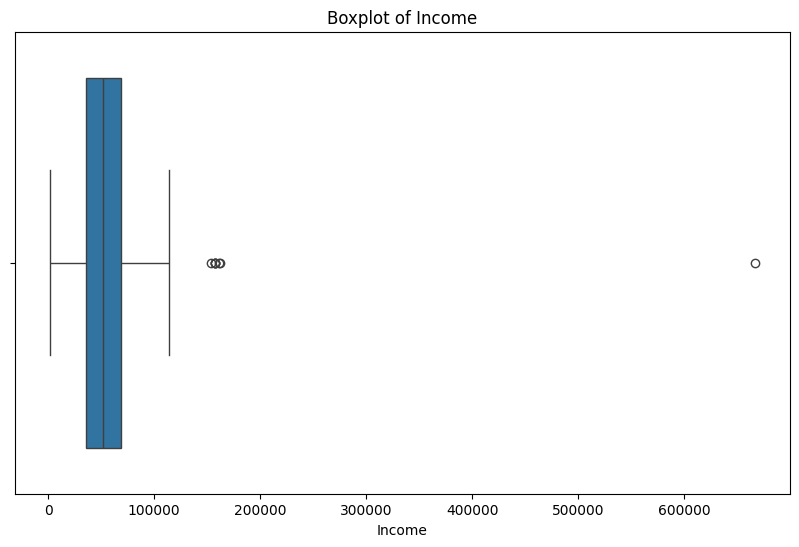

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

In [8]:
df = df[df['Income'] <= 200000]

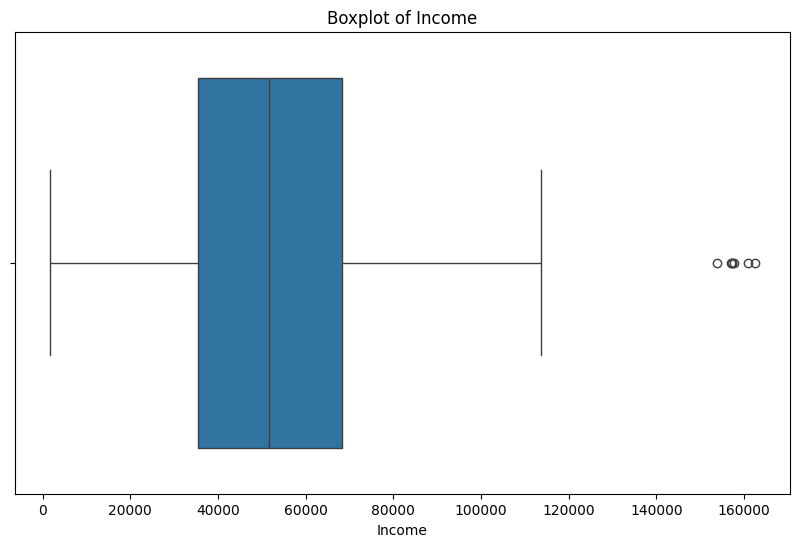

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

In [10]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,21,32,5,3,6,2,9,4,0,0


In [11]:
from datetime import datetime

# Assuming df is your DataFrame and 'Year_Birth' is the column with birth years
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']


In [12]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,35
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,32,43,1,4,7,5,2,1,0,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,34,65,1,10,10,7,6,1,0,70
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,0,7,1,2,1,3,5,0,0,57
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,32,5,3,6,2,9,4,0,0,70
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,32,5,3,6,2,9,4,0,0,70


In [13]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [14]:
# Assuming df is your DataFrame and 'Marital_Status' is the column with marital statuses
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Absurd', 'Alone', 'YOLO'], 'Single')


In [15]:
df['Marital_Status'].value_counts()

Marital_Status
Single      1066
Married      864
Divorced     232
Widow         77
Name: count, dtype: int64

In [16]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Single,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,35
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,32,43,1,4,7,5,2,1,0,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,34,65,1,10,10,7,6,1,0,70
7,1991,1967,Graduation,Single,44931.0,0,1,1/18/14,0,78,...,0,7,1,2,1,3,5,0,0,57
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,32,5,3,6,2,9,4,0,0,70
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,32,5,3,6,2,9,4,0,0,70


In [17]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\juanc\AppData\Local\Temp\ipykernel_24536\177162232.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [19]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Single,32474.0,1,1,2014-11-05,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,34,2,3,1,2,7,1,0,35
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,70
7,1991,1967,Graduation,Single,44931.0,0,1,2014-01-18,0,78,...,0,7,1,2,1,3,5,0,0,57
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,32,5,3,6,2,9,4,0,0,70
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,32,5,3,6,2,9,4,0,0,70


In [20]:
df[df.Year_Birth <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,1,1,0,2,4,0,0,131
827,1150,1899,PhD,Single,83532.0,0,0,2013-09-26,36,755,...,64,224,1,4,6,4,1,0,0,125
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,4,25,1,2,1,2,5,0,1,124


In [21]:
df.drop(df.index[df.Year_Birth <= 1900], inplace=True)

In [22]:
df['Age'].value_counts()

Age
48    89
53    87
49    83
52    79
54    77
46    77
59    74
51    74
55    71
50    69
68    55
66    53
45    53
72    52
65    51
47    51
56    51
70    50
58    50
64    49
69    49
61    45
42    45
57    44
62    44
67    43
73    43
60    42
41    42
38    42
44    39
43    39
40    38
63    36
71    35
39    32
35    30
75    30
74    29
36    29
37    27
76    21
34    18
78    16
77    16
33    15
32    13
79     8
80     7
81     7
31     5
29     5
30     3
28     2
83     1
84     1
Name: count, dtype: int64

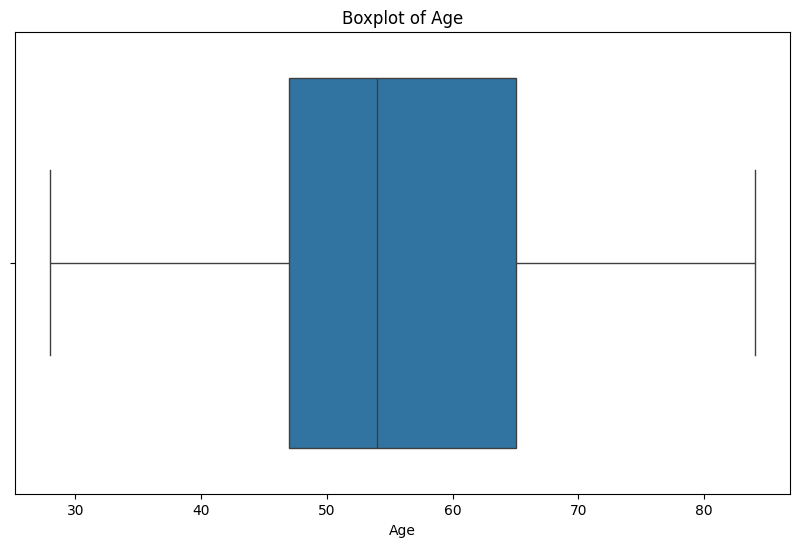

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

In [24]:
df = df[df['Age'] <= 80]

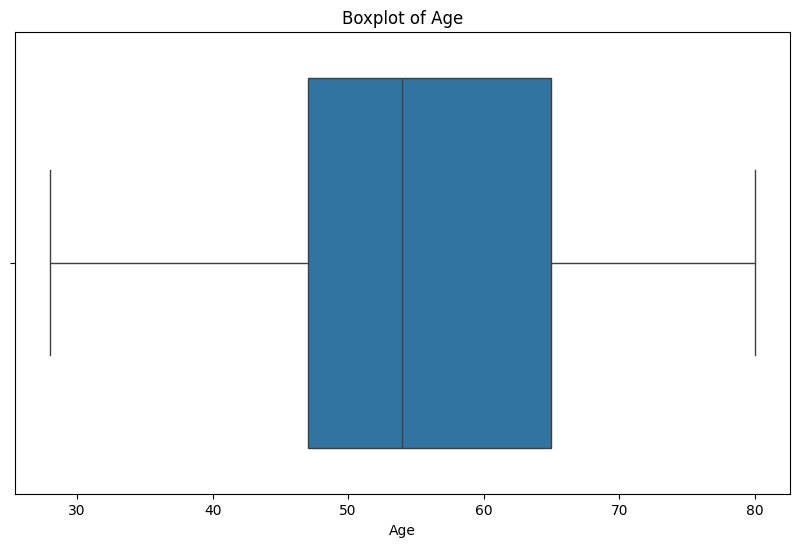

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

In [26]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Single,32474.0,1,1,2014-11-05,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,34,2,3,1,2,7,1,0,35
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,70
7,1991,1967,Graduation,Single,44931.0,0,1,2014-01-18,0,78,...,0,7,1,2,1,3,5,0,0,57
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,32,5,3,6,2,9,4,0,0,70
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,32,5,3,6,2,9,4,0,0,70


In [27]:
# Create a temporary column 'Marital_Status_Num'
df['Marital_Status_Num'] = df['Marital_Status'].replace(['Single', 'Widow', 'Divorced'], 1)
df['Marital_Status_Num'] = df['Marital_Status_Num'].replace(['Married'], 2)

# Create the 'Family' column
df['Family'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status_Num']

# Drop the temporary column
df = df.drop(columns=['Marital_Status_Num'])


In [28]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,3
3,1386,1967,Graduation,Single,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,3
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,2
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,43,1,4,7,5,2,1,0,66,1
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,65,1,10,10,7,6,1,0,70,2
7,1991,1967,Graduation,Single,44931.0,0,1,2014-01-18,0,78,...,7,1,2,1,3,5,0,0,57,2
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,5,3,6,2,9,4,0,0,70,3
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,5,3,6,2,9,4,0,0,70,3


In [29]:
df = df.drop(columns=['Year_Birth'])

In [30]:
df = df.drop(columns=['Kidhome'])

In [31]:
df = df.drop(columns=['Teenhome'])

In [32]:
df.head(15)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family
0,1826,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,...,218,1,4,4,6,1,1,0,54,1
1,1,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,...,37,1,7,3,7,5,1,0,63,1
2,10476,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,...,30,1,3,2,5,2,0,0,66,3
3,1386,Graduation,Single,32474.0,2014-11-05,0,10,0,1,0,...,0,1,1,0,2,7,0,0,57,3
4,5371,Graduation,Single,21474.0,2014-08-04,0,6,16,24,11,...,34,2,3,1,2,7,1,0,35,2
5,7348,PhD,Single,71691.0,2014-03-17,0,336,130,411,240,...,43,1,4,7,5,2,1,0,66,1
6,4073,2n Cycle,Married,63564.0,2014-01-29,0,769,80,252,15,...,65,1,10,10,7,6,1,0,70,2
7,1991,Graduation,Single,44931.0,2014-01-18,0,78,0,11,0,...,7,1,2,1,3,5,0,0,57,2
8,4047,PhD,Married,65324.0,2014-11-01,0,384,0,102,21,...,5,3,6,2,9,4,0,0,70,3
9,9477,PhD,Married,65324.0,2014-11-01,0,384,0,102,21,...,5,3,6,2,9,4,0,0,70,3


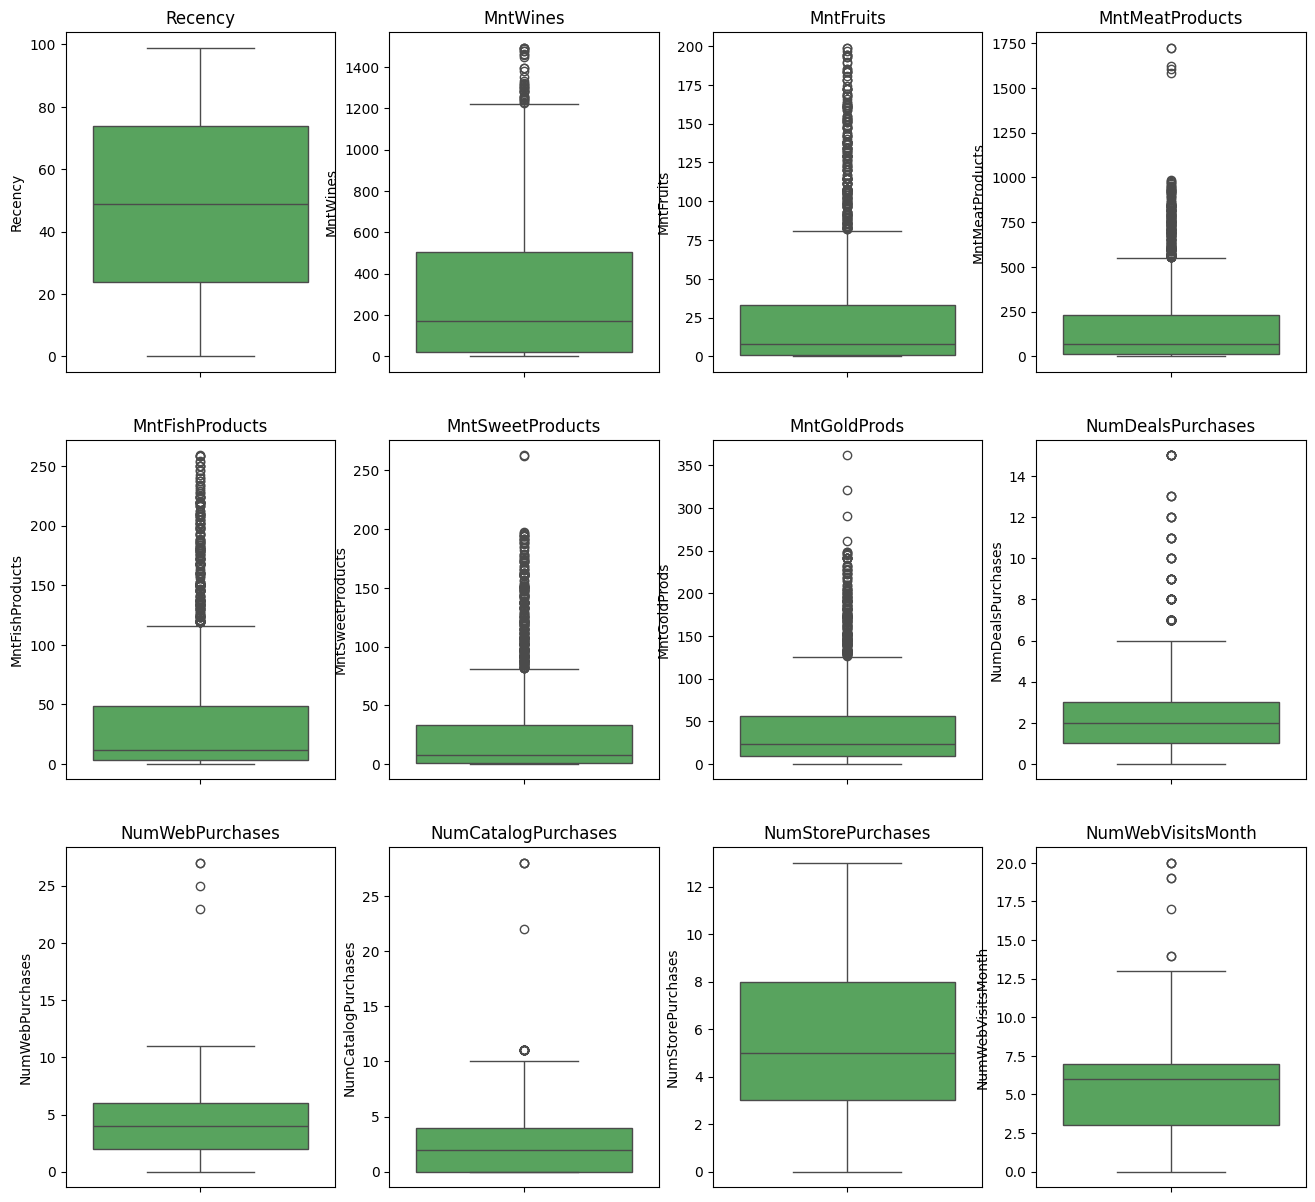

In [33]:
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF53')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

In [34]:
df.drop(df.index[df.MntMeatProducts > 1200], inplace=True)
df.drop(df.index[df.MntSweetProducts > 240], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

In [35]:
# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the number of days from 'Dt_Customer' to today
df['Dt_Customer'] = (datetime.today() - df['Dt_Customer']).dt.days

In [36]:
df.head(10)

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family
0,1826,Graduation,Divorced,84835.0,3543,0,189,104,379,111,...,218,1,4,4,6,1,1,0,54,1
1,1,Graduation,Single,57091.0,3544,0,464,5,64,7,...,37,1,7,3,7,5,1,0,63,1
2,10476,Graduation,Married,67267.0,3577,0,134,11,59,15,...,30,1,3,2,5,2,0,0,66,3
3,1386,Graduation,Single,32474.0,3401,0,10,0,1,0,...,0,1,1,0,2,7,0,0,57,3
4,5371,Graduation,Single,21474.0,3494,0,6,16,24,11,...,34,2,3,1,2,7,1,0,35,2
5,7348,PhD,Single,71691.0,3634,0,336,130,411,240,...,43,1,4,7,5,2,1,0,66,1
6,4073,2n Cycle,Married,63564.0,3681,0,769,80,252,15,...,65,1,10,10,7,6,1,0,70,2
7,1991,Graduation,Single,44931.0,3692,0,78,0,11,0,...,7,1,2,1,3,5,0,0,57,2
8,4047,PhD,Married,65324.0,3405,0,384,0,102,21,...,5,3,6,2,9,4,0,0,70,3
9,9477,PhD,Married,65324.0,3405,0,384,0,102,21,...,5,3,6,2,9,4,0,0,70,3


In [37]:
%pip install sklearn pandas
%pip install imbalanced-learn



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('Response', axis=1)
y = df.Response

X.shape, y.shape

((2218, 20), (2218,))

In [40]:
df.drop('ID', axis=1, inplace=True)

In [41]:
df.head(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family
0,Graduation,Divorced,84835.0,3543,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54,1
1,Graduation,Single,57091.0,3544,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63,1
2,Graduation,Married,67267.0,3577,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66,3
3,Graduation,Single,32474.0,3401,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57,3
4,Graduation,Single,21474.0,3494,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35,2


In [42]:
df = pd.get_dummies(df)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Education'] = le.fit_transform(X['Education'])
X['Marital_Status'] = le.fit_transform(X['Marital_Status'])

In [44]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [45]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((3774, 20), (3774,))

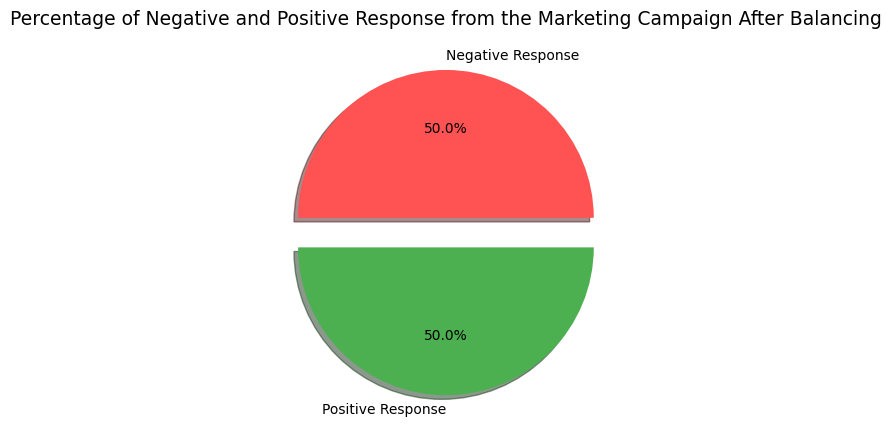

In [46]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign After Balancing', fontsize=13.5)

plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    stratify=y_resampled, test_size=0.2, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3019, 20), (755, 20), (3019,), (755,))

In [48]:
y_train.value_counts()

Response
0    1510
1    1509
Name: count, dtype: int64

In [50]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'Response' is the target variable
X = df.drop(columns=['Response'])
y = df['Response']

# If 'Education' and 'Marital_Status' are categorical, convert them to numerical


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.8783783783783784
Precision: 0.7241379310344828
Recall: 0.31343283582089554
F1 Score: 0.4375
AUC Score: 0.646106338334851


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a DataFrame to store the results
results = []
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machines', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]
# Evaluate each model
for name, model in models:
    # Increase max_iter for Logistic Regression
    if name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    # Append the results as a list instead of a dictionary
    results.append([name, accuracy, precision, recall, f1, auc])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Print the results
print(results_df)


                     Model  Accuracy  Precision    Recall  F1 Score       AUC
0      Logistic Regression  0.858108   0.550000  0.328358  0.411215  0.640306
1      K-Nearest Neighbors  0.851351   0.523810  0.164179  0.250000  0.568827
2  Support Vector Machines  0.871622   0.727273  0.238806  0.359551  0.611445
3            Decision Tree  0.826577   0.428571  0.447761  0.437956  0.670830
4            Random Forest  0.869369   0.645161  0.298507  0.408163  0.634665
